In [1]:
import numpy as np
import pandas as pd
from scipy.stats import entropy
import matplotlib.pyplot as plt
import random

import cornac
from cornac.eval_methods import RatioSplit
from cornac.data import TextModality
from cornac.data.text import BaseTokenizer
from cornac.models import CTR
from cornac.data import Reader

FM model is only supported on Linux.
Windows executable can be found at http://www.libfm.org.


### movielens

In [2]:
docs_movielens, item_ids_movielens = cornac.datasets.movielens.load_plot()
feedback_movielens_100K = cornac.datasets.movielens.load_feedback(variant="100K",reader=Reader(item_set=item_ids_movielens))

movielens_item_text_modality = TextModality(
    corpus=docs_movielens,
    ids=item_ids_movielens,
    tokenizer=BaseTokenizer(sep="\t", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)
# Define an evaluation method to split feedback into train and test sets
movieslens100K_ratio_split = RatioSplit(
    data=feedback_movielens_100K,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=movielens_item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=1,
)

rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 943
Number of items = 1518
Number of ratings = 75846
Max rating = 5.0
Min rating = 1.0
Global mean = 3.5
---
Test data:
Number of users = 941
Number of items = 1279
Number of ratings = 18925
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 943
Total items = 1518


In [4]:
# Instantiate CTR model
# Vary lambda_v={0.01, 0.1, 1, 10, 100, 1000, 10000}
# @TOPk=50, latent_factors=200
lambda_v = [0.01, 0.1, 1, 10, 100, 1000, 10000]
ctr_lambda_v = [CTR(k=200, max_iter=50, lambda_v=v) for v in lambda_v]
def run_ctr_v(ctr_lambda_v):
    # Use Recall@300 for evaluation
    rec_50 = cornac.metrics.Recall(k=50)
    precision_50 = cornac.metrics.Precision(k=50)
    f1_50 = cornac.metrics.FMeasure(k=50)
    NDCG_50 = cornac.metrics.NDCG(k=50)
    NCRR_50 = cornac.metrics.NCRR(k=50)
    # MRR_50 = cornac.metrics.MRR(k=50)
    # MeasureAtK_50 = cornac.metrics.MeasureAtK(k=50)
    # AUC_50 = cornac.metrics.AUC(k=50)
    # MAP = cornac.metrics.AUC(k=50)
    # Put everything together into an experiment and run it
    cornac.Experiment(eval_method=movieslens100K_ratio_split,
                      models=[ctr_lambda_v],
                      metrics=[rec_50, precision_50, f1_50, NDCG_50, NCRR_50]).run()

for ctr_v in ctr_lambda_v:
    run_ctr_v(ctr_v)


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/941 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0244 |  0.0091 |  0.0403 |       0.0142 |    0.1137 |  206.3402 |   0.6548


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/941 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0246 |  0.0090 |  0.0402 |       0.0143 |    0.1129 |  160.1409 |   0.9632


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/941 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0260 |  0.0095 |  0.0425 |       0.0151 |    0.1198 |  150.5176 |   0.7101


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/941 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0331 |  0.0126 |  0.0540 |       0.0195 |    0.1494 |  183.7686 |   0.6549


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/941 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0529 |  0.0292 |  0.0821 |       0.0335 |    0.2045 |  206.2163 |   1.2408


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/941 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0708 |  0.0757 |  0.1120 |       0.0509 |    0.2101 |  182.7198 |   0.6746


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/941 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0754 |  0.0971 |  0.1242 |       0.0564 |    0.2041 |  149.6774 |   1.0108



### citeulike

In [6]:
# citeulike dataset
docs_citeulike, item_ids_citeulike = cornac.datasets.citeulike.load_text()
feedback_citeulike = cornac.datasets.citeulike.load_feedback(reader=Reader(item_set=item_ids_citeulike))
citeulike_item_text_modality = TextModality(
    corpus=docs_citeulike,
    ids=item_ids_citeulike,
    tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)
# Define an evaluation method to split feedback into train and test sets
citeulike_ratio_split = RatioSplit(
    data=feedback_citeulike,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=citeulike_item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=1,
)

rating_threshold = 1.0
exclude_unknowns = True


/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 18 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)


---
Training data:
Number of users = 5551
Number of items = 16949
Number of ratings = 168396
Max rating = 1.0
Min rating = 1.0
Global mean = 1.0
---
Test data:
Number of users = 5444
Number of items = 14146
Number of ratings = 42053
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 5551
Total items = 16949


/Users/pigr/cornac/lib/python3.10/site-packages/cornac/data/dataset.py:361: UserWarning: 5 duplicated observations are removed!
  warnings.warn("%d duplicated observations are removed!" % dup_count)


In [7]:
# Instantiate CTR model
# Vary lambda_v={0.01, 0.1, 1, 10, 100, 1000, 10000}
# @TOPk=50, latent_factors=200
lambda_v = [0.01, 0.1, 1, 10, 100, 1000, 10000]
ctr_lambda_v_citeulike = [CTR(k=200, max_iter=50, lambda_v=v) for v in lambda_v]
def run_ctr_v(ctr_lambda_v):
    # Use Recall@300 for evaluation
    rec_50 = cornac.metrics.Recall(k=50)
    precision_50 = cornac.metrics.Precision(k=50)
    f1_50 = cornac.metrics.FMeasure(k=50)
    NDCG_50 = cornac.metrics.NDCG(k=50)
    NCRR_50 = cornac.metrics.NCRR(k=50)
    # MRR_50 = cornac.metrics.MRR(k=50)
    # MeasureAtK_50 = cornac.metrics.MeasureAtK(k=50)
    # AUC_50 = cornac.metrics.AUC(k=50)
    # MAP = cornac.metrics.AUC(k=50)
    # Put everything together into an experiment and run it
    cornac.Experiment(eval_method=citeulike_ratio_split,
                      models=[ctr_lambda_v],
                      metrics=[rec_50, precision_50, f1_50, NDCG_50, NCRR_50]).run()

for ctr_v in ctr_lambda_v_citeulike:
    run_ctr_v(ctr_v)


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/5444 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0557 |  0.0621 |  0.1274 |       0.0328 |    0.3130 | 1614.7452 |  23.6822


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/5444 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0558 |  0.0632 |  0.1279 |       0.0329 |    0.3120 | 1537.5242 |  22.1886


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/5444 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0560 |  0.0622 |  0.1278 |       0.0330 |    0.3133 | 1281.8830 |  20.5793


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/5444 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0538 |  0.0588 |  0.1217 |       0.0317 |    0.3001 | 1237.6182 |  22.2591


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/5444 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0392 |  0.0442 |  0.0849 |       0.0240 |    0.1997 | 1402.1837 |  25.0757


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/5444 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0138 |  0.0168 |  0.0271 |       0.0091 |    0.0521 | 1489.4861 |  23.6967


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/5444 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0065 |  0.0076 |  0.0123 |       0.0043 |    0.0233 | 1459.8942 |  24.3071



In [9]:
# lambda_v = 1, latent_factor = 100
ctr_k100 = CTR(k=100, max_iter=50, lambda_v=1)
rec_50 = cornac.metrics.Recall(k=50)
precision_50 = cornac.metrics.Precision(k=50)
f1_50 = cornac.metrics.FMeasure(k=50)
NDCG_50 = cornac.metrics.NDCG(k=50)
NCRR_50 = cornac.metrics.NCRR(k=50)
# MRR_50 = cornac.metrics.MRR(k=50)
# MeasureAtK_50 = cornac.metrics.MeasureAtK(k=50)
# AUC_50 = cornac.metrics.AUC(k=50)
# MAP = cornac.metrics.AUC(k=50)
# Put everything together into an experiment and run it
cornac.Experiment(eval_method=citeulike_ratio_split,
                  models=[ctr_k100],
                  metrics=[rec_50, precision_50, f1_50, NDCG_50, NCRR_50]).run()


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/5444 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0574 |  0.0763 |  0.1358 |       0.0347 |    0.3015 |  692.8992 |  20.9784



In [10]:
# lambda_v = 1, latent_factor = 100
ctr_k50 = CTR(k=50, max_iter=50, lambda_v=1)
rec_50 = cornac.metrics.Recall(k=50)
precision_50 = cornac.metrics.Precision(k=50)
f1_50 = cornac.metrics.FMeasure(k=50)
NDCG_50 = cornac.metrics.NDCG(k=50)
NCRR_50 = cornac.metrics.NCRR(k=50)
# MRR_50 = cornac.metrics.MRR(k=50)
# MeasureAtK_50 = cornac.metrics.MeasureAtK(k=50)
# AUC_50 = cornac.metrics.AUC(k=50)
# MAP = cornac.metrics.AUC(k=50)
# Put everything together into an experiment and run it
cornac.Experiment(eval_method=citeulike_ratio_split,
                  models=[ctr_k50],
                  metrics=[rec_50, precision_50, f1_50, NDCG_50, NCRR_50]).run()


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/5444 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0535 |  0.0735 |  0.1271 |       0.0328 |    0.2654 |  404.5894 |  20.2281



### amazon-clothing

In [36]:
# amazon_clothing dataset
docs_clothing, item_ids_clothing = cornac.datasets.amazon_clothing.load_text()
feedback_clothing = cornac.datasets.amazon_clothing.load_feedback(reader=Reader(item_set=item_ids_clothing))
clothing_item_text_modality = TextModality(
    corpus=docs_clothing,
    ids=item_ids_clothing,
    tokenizer=BaseTokenizer(sep=" ", stop_words="english"),
    max_vocab=8000,
    max_doc_freq=0.5,
)
# Define an evaluation method to split feedback into train and test sets
clothing_ratio_split = RatioSplit(
    data=feedback_clothing,
    test_size=0.2,
    exclude_unknowns=True,
    item_text=clothing_item_text_modality,
    verbose=True,
    seed=123,
    rating_threshold=1,
)


rating_threshold = 1.0
exclude_unknowns = True
---
Training data:
Number of users = 5081
Number of items = 3326
Number of ratings = 10951
Max rating = 5.0
Min rating = 1.0
Global mean = 4.3
---
Test data:
Number of users = 1868
Number of items = 1453
Number of ratings = 2200
Number of unknown users = 0
Number of unknown items = 0
---
Total users = 5081
Total items = 3326


In [38]:
# Instantiate CTR model
# Vary lambda_v={0.01, 0.1, 1, 10, 100, 1000, 10000}
# @TOPk=50, latent_factors=200
lambda_v = [0.01, 0.1, 1, 10, 100, 1000, 10000]
ctr_lambda_v_clothing = [CTR(k=200, max_iter=50, lambda_v=v) for v in lambda_v]
def run_ctr_v(ctr_lambda_v):
    # Use Recall@300 for evaluation
    rec_50 = cornac.metrics.Recall(k=50)
    precision_50 = cornac.metrics.Precision(k=50)
    f1_50 = cornac.metrics.FMeasure(k=50)
    NDCG_50 = cornac.metrics.NDCG(k=50)
    NCRR_50 = cornac.metrics.NCRR(k=50)
    # MRR_50 = cornac.metrics.MRR(k=50)
    # MeasureAtK_50 = cornac.metrics.MeasureAtK(k=50)
    # AUC_50 = cornac.metrics.AUC(k=50)
    # MAP = cornac.metrics.AUC(k=50)
    # Put everything together into an experiment and run it
    cornac.Experiment(eval_method=clothing_ratio_split,
                      models=[ctr_lambda_v],
                      metrics=[rec_50, precision_50, f1_50, NDCG_50, NCRR_50]).run()

for ctr_v in ctr_lambda_v_clothing:
    run_ctr_v(ctr_v)


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/1868 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0091 |  0.0370 |  0.0714 |       0.0047 |    0.1986 |  600.7235 |   2.1312


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/1868 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0092 |  0.0367 |  0.0716 |       0.0047 |    0.2017 |  416.4526 |   2.0067


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/1868 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0106 |  0.0416 |  0.0817 |       0.0055 |    0.2320 |  458.3524 |   2.2192


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/1868 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0123 |  0.0476 |  0.0951 |       0.0063 |    0.2694 |  416.1197 |   3.8272


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/1868 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0110 |  0.0420 |  0.0837 |       0.0056 |    0.2386 |  399.8075 |   2.0019


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/1868 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0101 |  0.0437 |  0.0804 |       0.0052 |    0.2191 |  382.0098 |   1.9995


[CTR] Training started!


  0%|          | 0/50 [00:00<?, ?it/s]

Learning completed!

[CTR] Evaluation started!


Ranking:   0%|          | 0/1868 [00:00<?, ?it/s]


TEST:
...
    |  F1@50 | NCRR@50 | NDCG@50 | Precision@50 | Recall@50 | Train (s) | Test (s)
--- + ------ + ------- + ------- + ------------ + --------- + --------- + --------
CTR | 0.0099 |  0.0417 |  0.0786 |       0.0051 |    0.2162 |  419.8967 |   3.9694



In [14]:
# This class is just convenient for getting two lists as inputs of the calibration metric computation
class Retrieval:

    def __init__(self, model, item_df, UIDX, TOPK) -> None:
        self.model = model
        self.item_df = item_df
        self.UIDX = UIDX
        self.TOPK = TOPK

    def convert_idx_id(self):
        # conversion between idx and id
        rating_mat = self.model.train_set.matrix
        user_id2idx = self.model.train_set.uid_map
        user_idx2id = list(self.model.train_set.user_ids)
        item_id2idx = self.model.train_set.iid_map
        item_idx2id = list(self.model.train_set.item_ids)

        return rating_mat, user_id2idx, user_idx2id, item_id2idx, item_idx2id

    def get_recy(self):
        item_idx2id = self.convert_idx_id()[4]
        recommendations = self.model.rank(self.UIDX)[0]
        distr = self.item_df.loc[[int(item_idx2id[i]) for i in recommendations[:self.TOPK]]]
        dict = {}
        for index, row in distr.items():
            dict[index] = np.count_nonzero(np.array(row))
        del dict['Title']
        del dict['Release Date']

        return dict

    def get_history(self):
        item_idx2id = self.convert_idx_id()[4]
        rating_mat = self.convert_idx_id()[0]
        rating_arr = rating_mat[self.UIDX].A.ravel()
        top_rated_items = np.argsort(rating_arr)[-self.TOPK:]
        distr = self.item_df.loc[[int(item_idx2id[i]) for i in top_rated_items]]
        dict = {}
        for index, row in distr.items():
            dict[index] = np.count_nonzero(np.array(row))
        del dict['Title']
        del dict['Release Date']

        return dict

In [21]:
def compute_kl_divergence(s, q, alpha=0.001):
    """
      params: s, q - two distributions (dict)

      KL (p || q), the lower the better.
      alpha is not really a tuning parameter, it's just there to make the
      computation more numerically stable.
    """
    try:
      assert 0.99 <= sum(s.values()) <= 1.01
      assert 0.99 <= sum(q.values()) <= 1.01
    except AssertionError:
      print("Assertion Error")
      pass
    kl_div = 0.
    ss = []
    qq = []
    merged_dic = opt_merge_max_mappings(s, q)
    for key in sorted(merged_dic.keys()):
      q_score = q.get(key, 0.)
      s_score = s.get(key, 0.)
      ss.append((1 - alpha) * s_score + alpha * q_score) # avoid misspecified metrics
      qq.append((1 - alpha) * q_score + alpha * s_score) # avoid misspecified metrics
    kl = entropy(ss, qq, base=2)
    return kl

def opt_merge_max_mappings(dict1, dict2):
    """ Merges two dictionaries based on the largest value in a given mapping.
    Parameters
    ----------
    dict1 : Dict[Any, Comparable]
    dict2 : Dict[Any, Comparable]
    Returns
    -------
    Dict[Any, Comparable]
        The merged dictionary
    """
    # we will iterate over `other` to populate `merged`
    merged, other = (dict1, dict2) if len(dict1) > len(dict2) else (dict2, dict1)
    merged = merged
    for key in other:
      if key not in merged or other[key] > merged[key]:
        merged[key] = other[key]
    return merged

def compute_distr(distr):
    """Compute the categorical distribution from a given list of Items.

    Returns
    -------
    dist [dict]: dictionary of feature distributions

    """

    # normalize the summed up probability, so it sums up to 1
    total_n = sum(list(distr.values()))
    for item, count in distr.items():
        distr[item] = count / total_n

    return distr

In [11]:
from cornac.utils import cache

# Download some information of MovieLens 100K dataset
user_df = pd.read_csv(
  cache("http://files.grouplens.org/datasets/movielens/ml-100k/u.user"),
  sep="|", names=["UserID", "Age", "Gender", "Occupation", "Zip Code"]
).set_index("UserID")

item_df = pd.read_csv(
  cache("http://files.grouplens.org/datasets/movielens/ml-100k/u.item"),
  sep="|", encoding="ISO-8859-1",
  names=["ItemID", "Title", "Release Date", "Video Release Date", "IMDb URL",
         "unknown", "Action", "Adventure", "Animation", "Children's", "Comedy",
         "Crime", "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror",
         "Musical", "Mystery", "Romance", "Sci-Fi", "Thriller", "War", "Western"]
).set_index("ItemID").drop(columns=["Video Release Date", "IMDb URL", "unknown"])

In [12]:
len(item_df.index)

1682

In [25]:
models = ctr_lambda_v
avg_result = []
for model in models: # for a specific model
    for i in range(len(set(user_df.index))):  # get the average result for all users
        result = []
        r = Retrieval(model=model, item_df=item_df, UIDX=i, TOPK=50)
        recommendation = compute_distr(r.get_recy())
        history = compute_distr(r.get_history())
        result.append(compute_kl_divergence(recommendation, history, alpha=0.001))
    avg_result.append(np.mean(result))


In [26]:
avg_result

[0.07604651682090911,
 0.07019727401332852,
 0.051785740781790865,
 0.061424307843017466,
 0.06250782182196596,
 0.08999826171890993,
 0.09598998221391099]

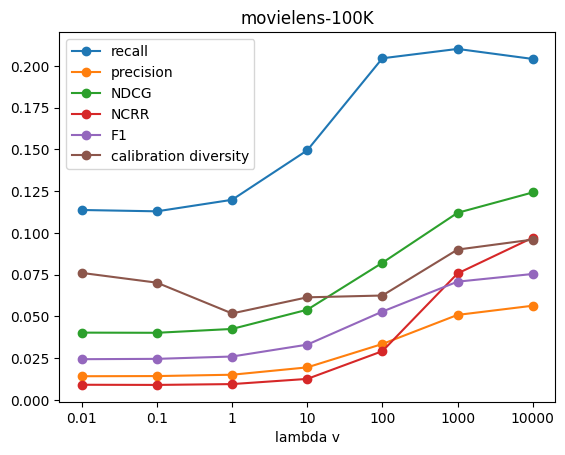

In [33]:
import matplotlib.pyplot as plt
lambda_v = [0.01, 0.1, 1, 10, 100, 1000, 10000]
x = np.arange(len(lambda_v))
recall_movielens = [0.1137,0.1129,0.1198,0.1494,0.2045,0.2101,0.2041]
precision_movielens = [0.0142,0.0143,0.0151,0.0195,0.0335,0.0509,0.0564]
ndcg_movielens = [0.0403,0.0402,0.0425,0.0540,0.0821,0.1120,0.1242]
ncrr_movielens = [0.0091,0.0090,0.0095,0.0126,0.0292,0.0757,0.0971]
f1_movielens = [0.0244,0.0246,0.0260,0.0331,0.0529,0.0708,0.0754]
plt.plot(x, recall_movielens, marker='o', label="recall")
plt.plot(x, precision_movielens, marker='o', label="precision")
plt.plot(x, ndcg_movielens, marker='o', label="NDCG")
plt.plot(x, ncrr_movielens, marker='o', label="NCRR")
plt.plot(x, f1_movielens, marker='o', label="F1")
plt.plot(x, avg_result, marker='o', label="calibration diversity")
plt.xticks(x,['0.01', '0.1', '1', '10', '100', '1000', '10000'])
plt.legend(loc="best")
plt.xlabel("lambda v")
plt.title('movielens-100K')
plt.show()

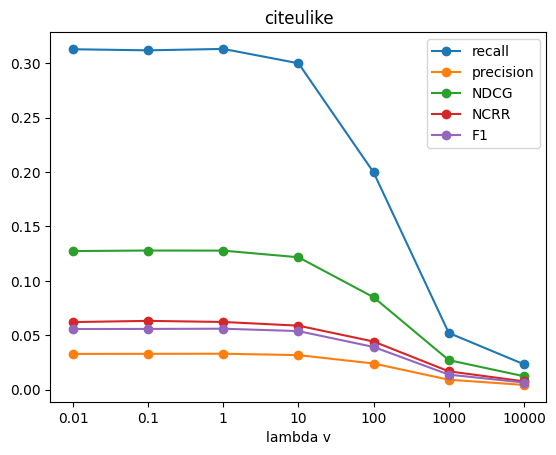

In [35]:
lambda_v = [0.01, 0.1, 1, 10, 100, 1000, 10000]
x = np.arange(len(lambda_v))
recall_citeulike = [0.3130,0.3120,0.3133,0.3001,0.1997,0.0521,0.0233]
precision_citeulike = [0.0328,0.0329,0.0330,0.0317,0.0240,0.0091,0.0043]
ndcg_citeulike = [0.1274,0.1279,0.1278,0.1217,0.0849,0.0271,0.0123]
ncrr_citeulike = [0.0621,0.0632,0.0622,0.0588,0.0442,0.0168,0.0076]
f1_citeulike = [0.0557,0.0558,0.0560,0.0538,0.0392,0.0138,0.0065]
plt.plot(x, recall_citeulike, marker='o', label="recall")
plt.plot(x, precision_citeulike, marker='o', label="precision")
plt.plot(x, ndcg_citeulike, marker='o', label="NDCG")
plt.plot(x, ncrr_citeulike, marker='o', label="NCRR")
plt.plot(x, f1_citeulike, marker='o', label="F1")
# plt.plot(x, avg_result, marker='o', label="calibration diversity")
plt.xticks(x,['0.01', '0.1', '1', '10', '100', '1000', '10000'])
plt.legend(loc="best")
plt.xlabel("lambda v")
plt.title('citeulike')
plt.show()

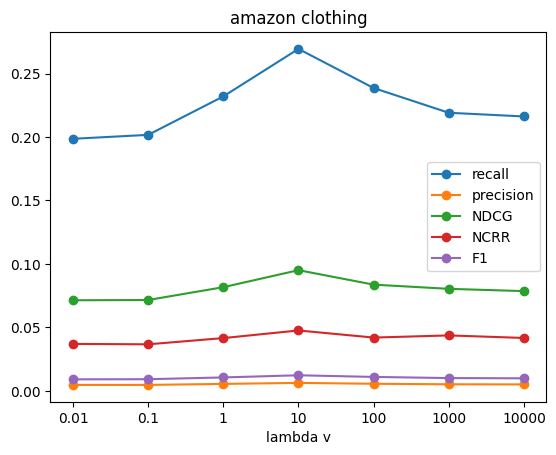

In [39]:
lambda_v = [0.01, 0.1, 1, 10, 100, 1000, 10000]
x = np.arange(len(lambda_v))
recall_clothing = [0.1986,0.2017,0.2320,0.2694,0.2386,0.2191,0.2162]
precision_clothing = [0.0047,0.0047,0.0055,0.0063,0.0056,0.0052,0.0051]
ndcg_clothing = [0.0714,0.0716,0.0817,0.0951,0.0837,0.0804,0.0786]
ncrr_clothing = [0.0370,0.0367,0.0416,0.0476,0.0420,0.0437,0.0417]
f1_clothing = [0.0091,0.0092,0.0106,0.0123,0.0110,0.0101,0.0099]
plt.plot(x, recall_clothing, marker='o', label="recall")
plt.plot(x, precision_clothing, marker='o', label="precision")
plt.plot(x, ndcg_clothing, marker='o', label="NDCG")
plt.plot(x, ncrr_clothing, marker='o', label="NCRR")
plt.plot(x, f1_clothing, marker='o', label="F1")
# plt.plot(x, avg_result, marker='o', label="calibration diversity")
plt.xticks(x,['0.01', '0.1', '1', '10', '100', '1000', '10000'])
plt.legend(loc="best")
plt.xlabel("lambda v")
plt.title('amazon clothing')
plt.show()